# First Neural Net - MNIST
MNIST is considered the "Hello World" of Computer Vision. We will use it to write our first Neural Network.

First we import TensorFlow and some support libraries

In [0]:
import tensorflow as tf         # Library for Machine Learning
import numpy as np              # Numerical library with matrices etc
import matplotlib.pyplot as plt # for plotting and visualization

**Step 1: Get the Data.** The MNIST dataset is readily available in TensorFlow.


In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Let's explore the data:

In [5]:
train_images.shape


(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

We build the model with one hidden layer with 512 nodes.

> Indented block



In [8]:
test_images.shape

(10000, 28, 28)

In [19]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

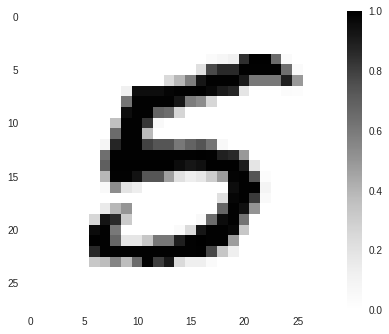

In [17]:
plt.figure()
plt.imshow(train_images[20000])
plt.colorbar()
plt.grid(False)

We want to pre-process the data to fall in the range of 0 - 1. We do that by dividing with the largest value (250)

In [0]:
train_images, test_images = train_images/255.0 , test_images/255.0

**Step 2: Build the model**
We use a simple neural network with 1 hidden layer

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input layer 28 x 28 = 784 nodes
  tf.keras.layers.Dense(512, activation=tf.nn.relu), # hidden layer 512 nodes
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Output layer 10 nodes
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Step 3: Train the model**
Here we train for 5 epochs

In [11]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1000/1000 [==============================] - 0s 314us/step - loss: 0.0836 - acc: 0.9890
Epoch 2/3
1000/1000 [==============================] - 0s 315us/step - loss: 0.0638 - acc: 0.9930
Epoch 3/3
1000/1000 [==============================] - 0s 317us/step - loss: 0.0458 - acc: 0.9970


**Step 4: Evaluate the model**
we want to test if our model is making good predictions on data it never saw before, so we use the 10,000 images from the test set




In [32]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 79us/step


[0.07484823845867068, 0.9769]

**Step 5: Predict**
Lets see how the model does in predicting digits from images. Let's choose the first image in the test set.
First we will plot it to see what it looks like:

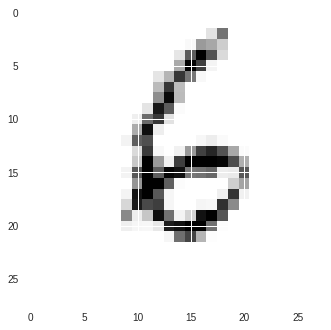

In [21]:
plt.imshow(test_images[2000])

Okay, that looks like a 7 to me, lets check the label

In [22]:
test_labels[2000]

6

Now Let's see what the model reads it as

In [0]:
predictions = model.predict(test_images)


In [24]:
predictions[2000]

array([5.1789990e-05, 5.6364411e-04, 7.8258161e-03, 6.3855265e-04,
       7.6251733e-03, 2.3614343e-03, 9.7349000e-01, 4.0560899e-05,
       5.9531289e-03, 1.4499660e-03], dtype=float32)

In [25]:
np.argmax(predictions[2000])

6

In [0]:
import os

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)


model.fit(train_images, train_labels,  epochs = 3, 
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback])  # pass callback to training


In [0]:
!ls {checkpoint_dir}

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

Create new untrained model:

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)), # hidden layer 512 nodes
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Output layer 10 nodes
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
  
loss, acc = model.evaluate(test_images, test_labels)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 1s 500us/step
Untrained model, accuracy:  8.30%


In [7]:
loss

2.3970928211212157

In [8]:
acc

0.083

accuracy is low, as expected.
Let's load the weights:

In [0]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

there are many options you can set with checkpoints, see TensorFlow tutorial for more info
https://www.tensorflow.org/tutorials/keras/save_and_restore_models


An alternative to checkpoints is to manually save the weights

In [0]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

**Save the entire model** 

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Save entire model to a HDF5 file
model.save('my_model.h5')

In [0]:
# Recreate the exact same model, including weights and optimizer.
new_model = tf.keras.models.load_model('my_model.h5')
new_model.summary()


In [0]:
loss, acc = new_model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [0]:
!ls

In [0]:
from google.colab import files
files.download('my_model.h5')